# Exploratory Data Analysis for Rossmann Pharmaceuticals

This notebook aims to explore customer purchasing behavior across various stores by analyzing sales data, promotions, and other factors affecting sales.

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

### Load the Data

In [20]:
# Load the necessary libraries
import pandas as pd

# Load the datasets
train_data = pd.read_csv('../data/train.csv')  # Update with the actual path to your training data
test_data = pd.read_csv('../data/test.csv')    # Update with the actual path to your test data

# Display the first few rows of the training data
print("train data")
print(train_data.head())
print("test data")
print(test_data.head())
print("store data")
print(store_data.head())

# Load the store data
store_data = pd.read_csv('../data/store.csv')  # Update with the actual path to your store data

# Display the first few rows of the store data to verify its structure
print(store_data.head())

# Merge the training data with the store data
merged_data = pd.merge(train_data, store_data, on='Store', how='left')

# Verify the merged DataFrame
print("Columns in merged data:", merged_data.columns.tolist())
print("First few rows of merged data:\n", merged_data.head())

/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_4568/950654696.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('../data/train.csv')  # Update with the actual path to your training data


train data
   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  
test data
   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5

### Data Cleaning

In [4]:
# Check for missing values
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()

# Display missing values
print("Missing values in training data:\n", missing_train[missing_train > 0])
print("\nMissing values in test data:\n", missing_test[missing_test > 0])

# Check for duplicates
duplicates_train = train_data.duplicated().sum()
duplicates_test = test_data.duplicated().sum()

print(f"\nDuplicates in training data: {duplicates_train}")
print(f"Duplicates in test data: {duplicates_test}")

# Handle missing values (example: drop rows with missing target variable 'Sales')
train_data.dropna(subset=['Sales'], inplace=True)

# Handle outliers (example: using IQR method)
Q1 = train_data['Sales'].quantile(0.25)
Q3 = train_data['Sales'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
train_data = train_data[(train_data['Sales'] >= lower_bound) & (train_data['Sales'] <= upper_bound)]

# Check data types
print("\nData types in training data:\n", train_data.dtypes)
print("\nData types in test data:\n", test_data.dtypes)

# Convert data types if necessary (example: convert 'Date' to datetime)
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

Missing values in training data:
 Series([], dtype: int64)

Missing values in test data:
 Open    11
dtype: int64

Duplicates in training data: 0
Duplicates in test data: 0

Data types in training data:
 Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

Data types in test data:
 Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object


### Handling Missing Values and Data Type Conversion

In [5]:
# Handle missing values in test data
test_data['Open'].fillna(1, inplace=True)  # Assuming missing means the store is open

# Convert 'Open' column to int
test_data['Open'] = test_data['Open'].astype(int)

# Verify changes
print("\nMissing values in test data after handling:\n", test_data.isnull().sum())
print("\nData types in test data after conversion:\n", test_data.dtypes)


Missing values in test data after handling:
 Id               0
Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

Data types in test data after conversion:
 Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object


/var/folders/h5/cqk4jd793hzd58k1ssq6mkd40000gn/T/ipykernel_4568/1338748617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Open'].fillna(1, inplace=True)  # Assuming missing means the store is open


## Exploratory_data_analysis

### Visualize Distribution of Promotions: 
Check if promotions are distributed similarly between training and test sets.

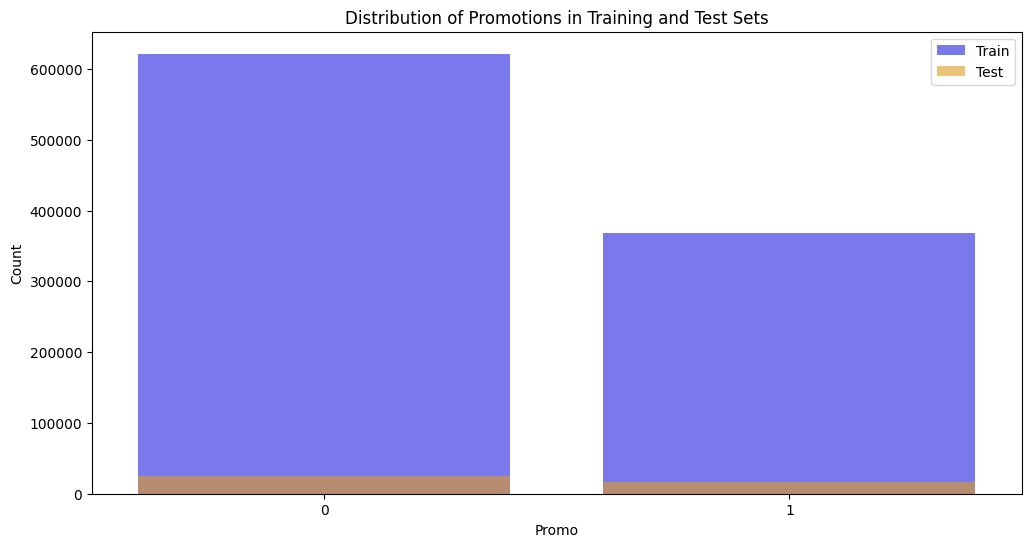

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Promo', data=train_data, color='blue', alpha=0.6, label='Train')
sns.countplot(x='Promo', data=test_data, color='orange', alpha=0.6, label='Test')
plt.title('Distribution of Promotions in Training and Test Sets')
plt.xlabel('Promo')
plt.ylabel('Count')
plt.legend()
plt.show()

### Analyze Sales Behavior Around Holidays 
Analyze sales behavior before, during, and after holidays.

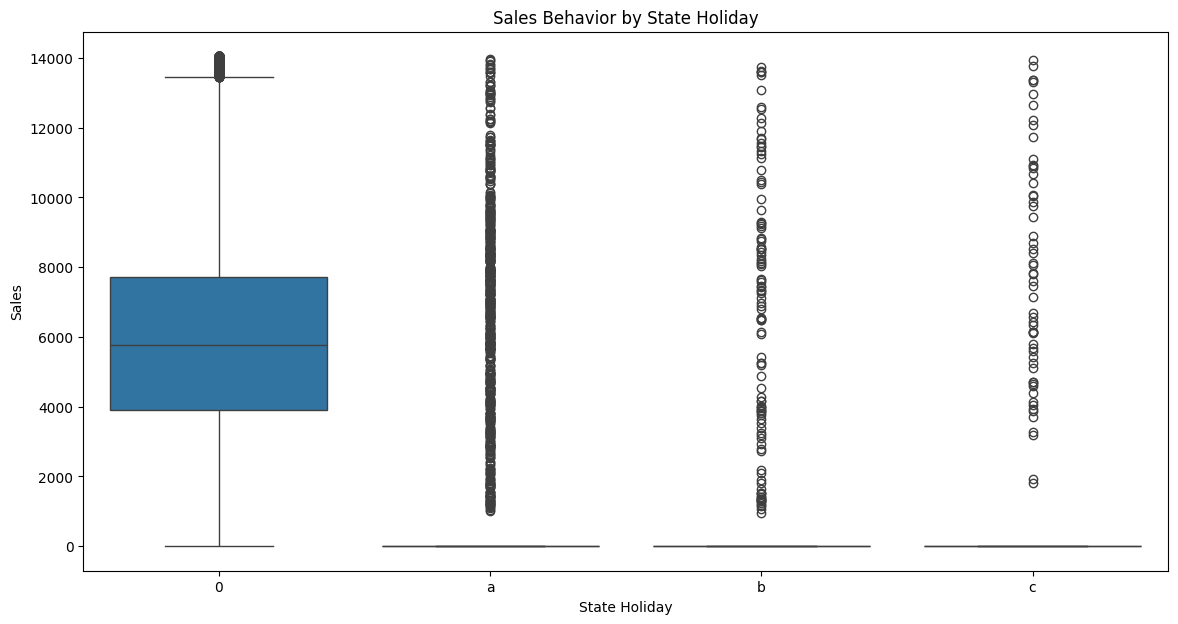

In [7]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='StateHoliday', y='Sales', data=train_data)
plt.title('Sales Behavior by State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

### Seasonal Purchase Behaviors
Investigate seasonal trends (e.g., Christmas, Easter).

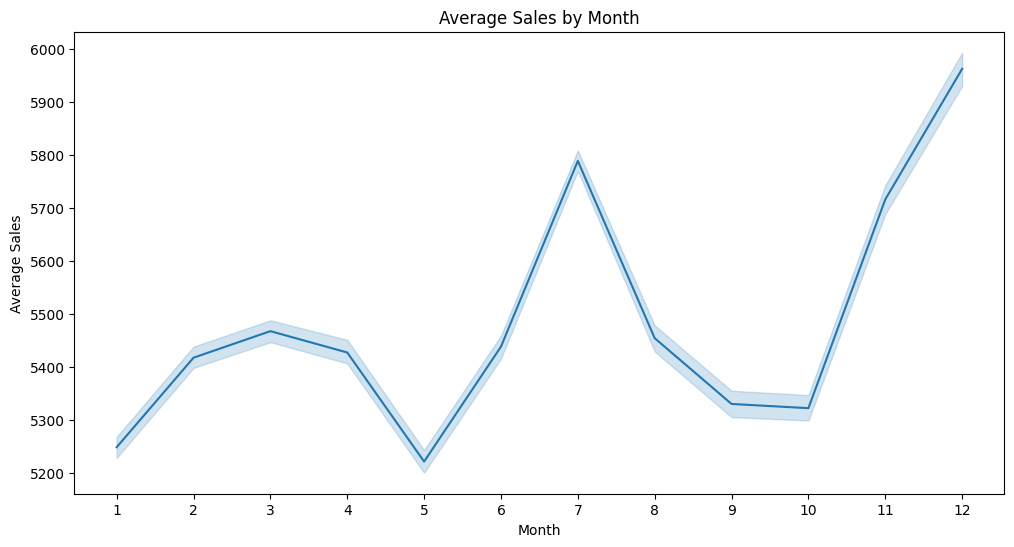

In [8]:
train_data['Month'] = train_data['Date'].dt.month
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Sales', data=train_data, estimator='mean')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13))
plt.show()

### Correlation Between Sales and Customers
Explore the relationship between sales and the number of customers.

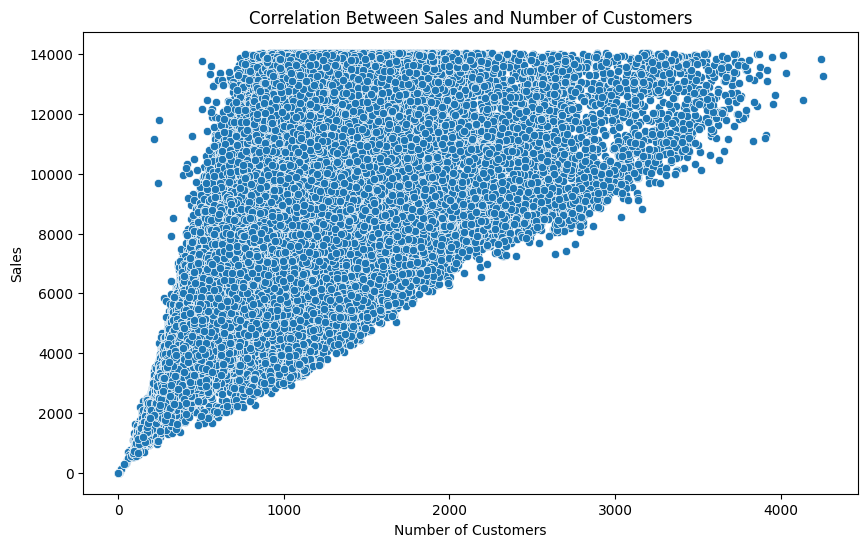

Correlation coefficient between Sales and Customers: 0.89


In [9]:
# Correlation between Sales and Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_data)
plt.title('Correlation Between Sales and Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Calculate and display the correlation coefficient
correlation = train_data['Sales'].corr(train_data['Customers'])
print(f"Correlation coefficient between Sales and Customers: {correlation:.2f}")

### Impact of Promotions on Sales
Analyze how promotions affect sales and customer behavior.


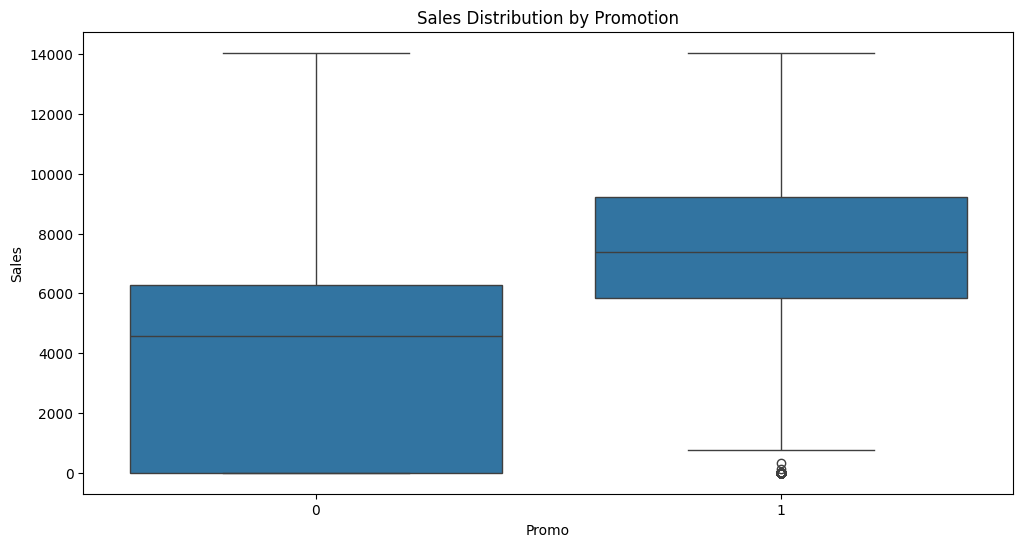

Average Customers with Promo: 766.26
Average Customers without Promo: 496.01


In [10]:
# Impact of promotions on sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Sales Distribution by Promotion')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

# Analyze the average number of customers with and without promotions
avg_customers_with_promo = train_data[train_data['Promo'] == 1]['Customers'].mean()
avg_customers_without_promo = train_data[train_data['Promo'] == 0]['Customers'].mean()

print(f"Average Customers with Promo: {avg_customers_with_promo:.2f}")
print(f"Average Customers without Promo: {avg_customers_without_promo:.2f}")

### Store Opening and Closing Times
Examine trends in customer behavior during store opening and closing times.

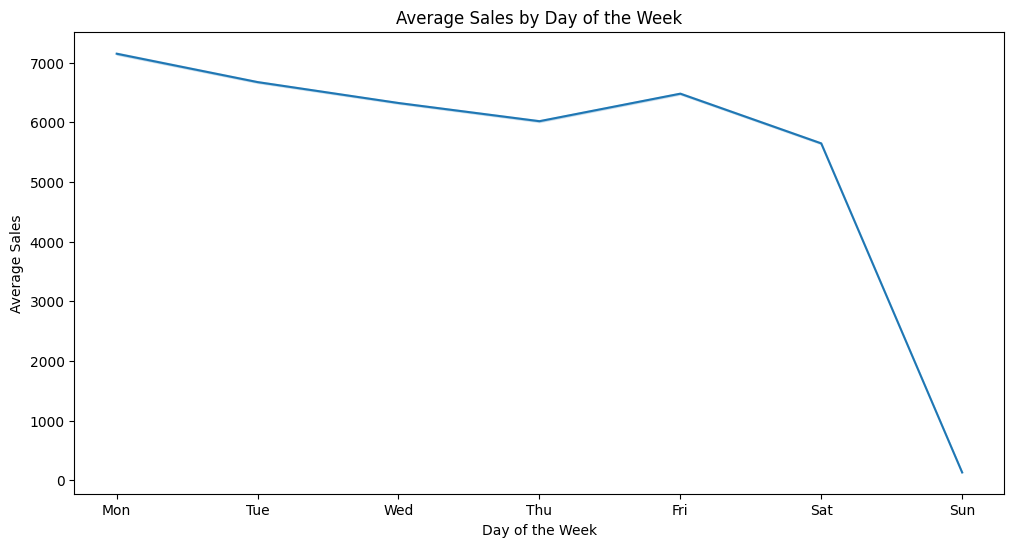

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='DayOfWeek', y='Sales', data=train_data, estimator='mean')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

### Assortment Type Effect on Sales
Investigate how the assortment type affects sales.


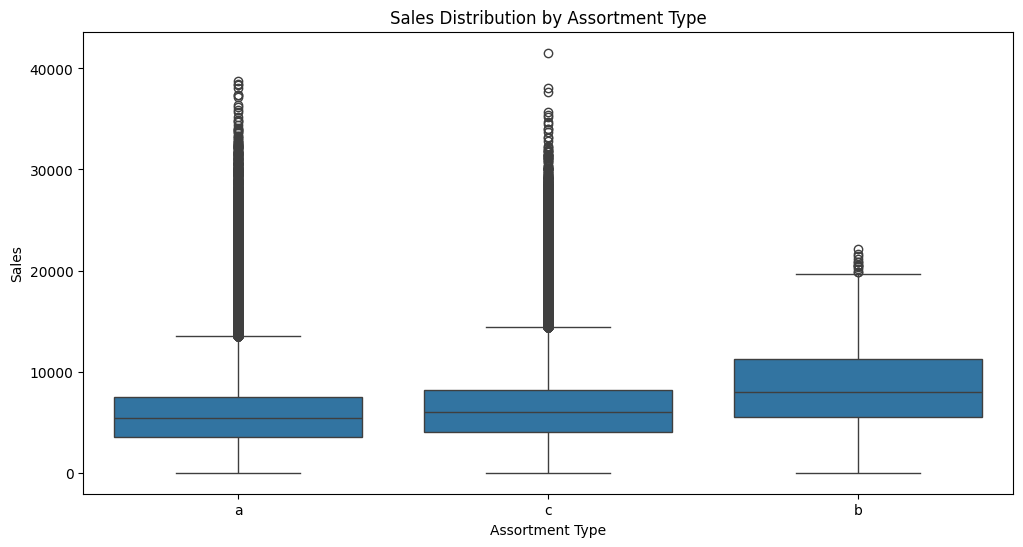

In [21]:
# Assortment Type Effect on Sales
plt.figure(figsize=(12, 6))
sns.boxplot(x='Assortment', y='Sales', data=merged_data)
plt.title('Sales Distribution by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()



###  Competitor Distance Analysis
Assess the impact of competitor distance on sales.

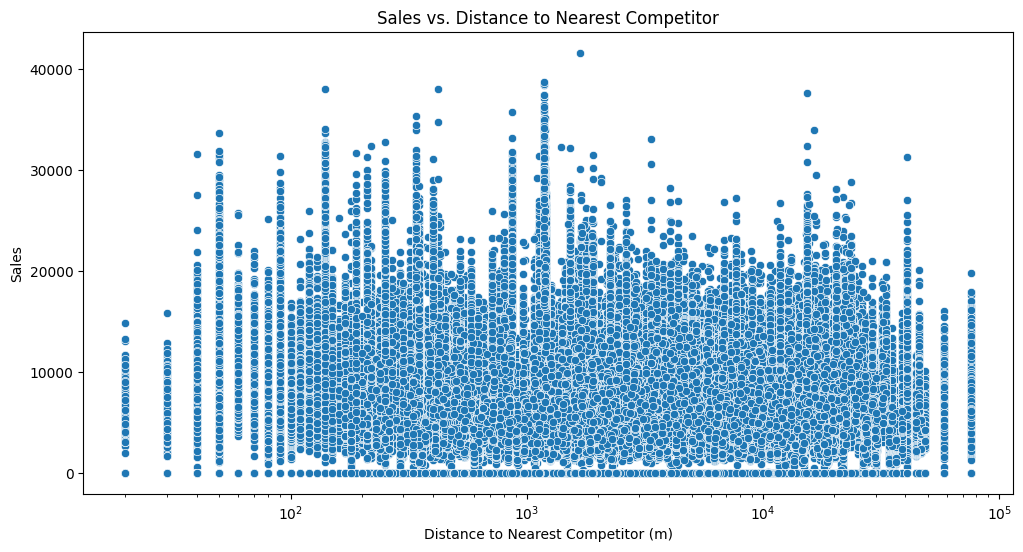

Correlation coefficient between Sales and Competition Distance: -0.02


In [16]:
# Analyze the effect of competitor distance on sales
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data)
plt.title('Sales vs. Distance to Nearest Competitor')
plt.xlabel('Distance to Nearest Competitor (m)')
plt.ylabel('Sales')
plt.xscale('log')  # Use log scale for better visualization
plt.show()

# Additional Analysis: Correlation between Sales and CompetitionDistance
correlation_distance = merged_data['Sales'].corr(merged_data['CompetitionDistance'].fillna(0))  # Fill NA for correlation
print(f"Correlation coefficient between Sales and Competition Distance: {correlation_distance:.2f}")